In [1]:
#fuzzy c-means

In [2]:
#importanto as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# conjunto de dados
data = {'x': [1, 1.5, 1.3, 3], 'y': [3, 3.2, 2.8, 1]}
data = pd.DataFrame.from_dict(data)
data

,x,y
0,1.0,3.0
1,1.5,3.2
2,1.3,2.8
3,3.0,1.0


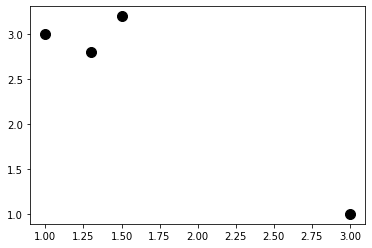

In [4]:
# visualizando
for i in range(0,len(data)):
    plt.plot(data['x'][i], data['y'][i], 'o', color='black', markersize=10)

In [5]:
# parametros
c = 2 #num clusters
m = 2 #parametro fuzzy

In [6]:
### Matrix fuzzy inicial

# como sao dois clusters tem 2 linhas
# como sao 4 pontos, tem 4 colunas

# Essa matriz da um "palpite" inicial sobre qual grupo um determinado elemento faz parte
# nesse exemplo o primeiro ponto (1.0, 3.0), segundo esse palpite, tem 100% de estar no 
# grupo 1 e 0% de estar no grupo 2

U_0 = [[1, 1, 1, 0], [0, 0, 0, 1]]

# ponto 1 (1.0 e 3.0), 100% de chance de estar no grupo 1 e 0% de estar no grupo 2

# U_0 = [(1),1,1,0
#        (0),0,0,1]

# a questão aqui é que o fuzzy permite um elemento estar em "dois grupos ao mesmo tempo", bastando 
# totalizar 1 unidade. Ao invés de ser 1 e 0 poderia ser 0.8 e 0.2

In [36]:
U_0

[[0.08615786293989426, 0.1034733039879841, 0.07569459387901893, 1.0],
 [0.9138421370601058, 0.896526696012016, 0.9243054061209811, 0.0]]

## $V_{(i,j)} = \frac{\sum_{i=1}^{n} U_{j,i}^{m} \times x_{j,i} }{\sum_{i=1}^{n} U_{j,i}^{m}}  $

In [8]:
## calculo do centroide dos cluesters

# calculo especial pois leva em conta a matriz de probabilidade e parametro fuzzy
# m aqui vale 2, poderia valer mais ou menos

# V = SUM U_i^m * X / SUM U_i^m
# V = SUM U_i^m * Y / SUM U_i^m

# centroide 1:
# V = (1)^2 *1 + (1)^2 *1.5 + (1)^2 *1.3 + (0)^2 *3 / ( (1)^2 + (1)^2 + (1)^2 + (0)^2 ) <- pontos X aplicados linha 1110
# V = (1)^2 *3 + (1)^2 *3.2 + (1)^2 *2.8 + (0)^2 *1 / ( (1)^2 + (1)^2 + (1)^2 + (0)^2 ) <- pontos Y aplicados linha 1110
# se m fosse por ex 1.25 --> V = (1)^1.25 *1 + (1)^1.25 *1.5 _ ...


# centroide 2:
# V = (0)^2 *1 + (0)^2 *1.5 + (0)^2 *1.3 + (1)^2 *3 / ( (0)^2 + (0)^2 + (0)^2 + (1)^2 ) <- pontos X aplicados linha 0001
# V = (0)^2 *3 + (0)^2 *3.2 + (0)^2 *2.8 + (1)^2 *1 / ( (0)^2 + (0)^2 + (0)^2 + (1)^2 ) <- pontos Y aplicados linha 0001

centroides = []
for i in range(0,2):
    numerador_x = 0
    denominador_x = 0
    numerador_y = 0
    denominador_y = 0    
    for j in range(0,4):
        numerador_x = numerador_x + ( (U_0[i][j])**m * data['x'][j] )
        denominador_x = denominador_x + ( (U_0[i][j])**m )

        
        numerador_y = numerador_y + ( (U_0[i][j])**m * data['y'][j] )
        denominador_y = denominador_y + ( (U_0[i][j])**m )  



    centroides.append([numerador_x/denominador_x, numerador_y/denominador_y])

print(centroides)

[[1.2666666666666666, 3.0], [3.0, 1.0]]


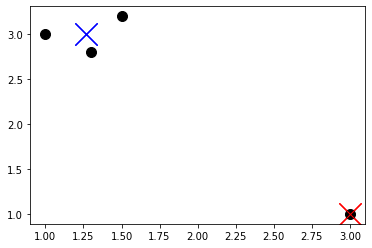

In [9]:
# apresentando os novos centroides
for i in range(0,len(data)):
    plt.plot(data['x'][i], data['y'][i], 'o', color='black', markersize=10)
    plt.plot(centroides[0][0], centroides[0][1], 'x', color='blue', markersize=22)
    plt.plot(centroides[1][0], centroides[1][1], 'x', color='red', markersize=22)    

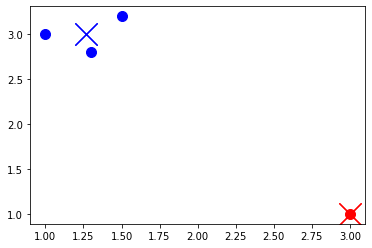

In [10]:
# clusterizando por dist euclidiana
for i in range(0,len(data)):
    dist_p1 = ( (data['x'][i]-centroides[0][0])**2 + (data['y'][i]-centroides[0][1])**2 )**0.5
    dist_p2 = ( (data['x'][i]-centroides[1][0])**2 + (data['y'][i]-centroides[1][1])**2 )**0.5    
    if dist_p1 <= dist_p2:
        plt.plot(data['x'][i], data['y'][i], 'o', color='blue', markersize=10)
    else:
        plt.plot(data['x'][i], data['y'][i], 'o', color='red', markersize=10)
    plt.plot(centroides[0][0], centroides[0][1], 'x', color='blue', markersize=22)
    plt.plot(centroides[1][0], centroides[1][1], 'x', color='red', markersize=22)   

In [11]:
## calcular a distancia dos pontos para cada centro novo explicitamente

In [12]:
#d11 = SQRT( (1-1.26)^2 + (3-3)^2   ) = 0.26

distancias_1 = []
distancias_2 = []

for i in range(0,4):
    valor1 = ((data['x'][i] - centroides[0][0])**2 +  (data['y'][i] - centroides[0][1])**2  )**0.5
    valor2 = ((data['x'][i] - centroides[1][0])**2 +  (data['y'][i] - centroides[1][1])**2  )**0.5
    distancias_1.append(valor1)
    distancias_2.append(valor2)


In [13]:
# pontos em azul, conferir na imagem
distancias_1

[0.2666666666666666,
 0.30731814857642975,
 0.20275875100994084,
 2.6465910988372277]

In [14]:
# pontos em vermelho, conferir na imagem
distancias_2

[2.8284271247461903, 2.6627053911388696, 2.475883680627989, 0.0]

### $U_{j,i} = \left[ \sum_{i=1}^{k} \frac{d_{i,k}^{(m-1)}}{d_{j,k}^{(m-1)}} \right]^{-1}$

In [15]:
# gerando nova matriz de probabilidade (atualizada)

#criei uma matriz vazia de probabilidades, vou preencher com as probabilidades novas
U_1 = [[0, 0, 0, 0], [0, 0, 0, 0]]

# probabilidade 1 (linha 1 da matriz) do ponto 1
# [ (dist_1[0] / dist_1[0])^(1-m) + (dist_1[0] / dist_2[0])^(1-m) ] ** -1
# probabilidade 1 (linha 1 da matriz) do ponto 2
# [ (dist_1[1] / dist_1[1])^(1-m) + (dist_1[1] / dist_2[1])^(1-m) ] ** -1
# ...



for i in range(0,4):
    conta = ((1)**(1-m) + (distancias_1[i]/distancias_2[i])**(1-m))**-1
    U_1[0][i] = conta
    
U_1

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


[[0.08615786293989426, 0.1034733039879841, 0.07569459387901893, 1.0],
 [0, 0, 0, 0]]

In [16]:
# primeira linha pronta
# pra segunda linha eu poderia somente inverter os indices da conta acima, entretanto lembremos que a segunda linha
# é o complemento de 1 unidade da segunda, entao mais simpleificadamente

for i in range(0,4):
    U_1[1][i] = 1 - U_1[0][i]
    
U_1    

[[0.08615786293989426, 0.1034733039879841, 0.07569459387901893, 1.0],
 [0.9138421370601058, 0.896526696012016, 0.9243054061209811, 0.0]]

In [17]:
## provando que daria a mesma coisa invertendo indices
for i in range(0,4):
    conta = ((1)**(1-m) + (distancias_2[i]/distancias_1[i])**(1-m))**-1
    print(conta)

0.9138421370601058
0.896526696012016
0.9243054061209811
0.0


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
#############################
#guardando centroides antigos, pois novos serao calculados

In [19]:
centroides_rodada_anterior = centroides

#aproveitando o nome da variaval pra matriz
U_0 = U_1

In [20]:
## calculo dos NOVOS centroides dos cluesters, ja usando a matriz nova

# V = SUM U_i^2 * X / SUM U_i^2

# V = (1)*1 + (1)*1.5 + (1)*1.3 + (0)*3 / (1+1+1+0)
# V = (1)*3 + (1)*3.2 + (1)*2.8 + (0)*1 / (1+1+1+0)


centroides = []
for i in range(0,2):
    numerador_x = 0
    denominador_x = 0
    numerador_y = 0
    denominador_y = 0    
    for j in range(0,4):
        numerador_x = numerador_x + ( (U_0[i][j])**m * data['x'][j] )
        denominador_x = denominador_x + ( (U_0[i][j])**m )

        
        numerador_y = numerador_y + ( (U_0[i][j])**m * data['y'][j] )
        denominador_y = denominador_y + ( (U_0[i][j])**m )  



    centroides.append([numerador_x/denominador_x, numerador_y/denominador_y])

print(centroides)

[[2.9603003338316536, 1.047579335030739], [1.2639900841654057, 2.9959425474273247]]


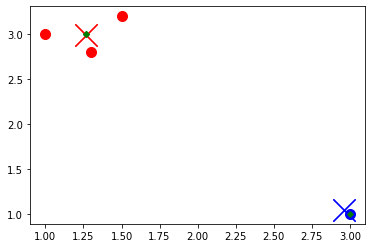

In [21]:
#plotando os novos centroides, o agrupamento e os centroides da rodada antiga (verdes) para comparacao

for i in range(0,len(data)):
    dist_p1 = ( (data['x'][i]-centroides[0][0])**2 + (data['y'][i]-centroides[0][1])**2 )**0.5
    dist_p2 = ( (data['x'][i]-centroides[1][0])**2 + (data['y'][i]-centroides[1][1])**2 )**0.5    
    if dist_p1 <= dist_p2:
        plt.plot(data['x'][i], data['y'][i], 'o', color='blue', markersize=10)
    else:
        plt.plot(data['x'][i], data['y'][i], 'o', color='red', markersize=10)
    plt.plot(centroides[0][0], centroides[0][1], 'x', color='blue', markersize=22)
    plt.plot(centroides[1][0], centroides[1][1], 'x', color='red', markersize=22)  
    plt.plot(centroides_rodada_anterior[0][0], centroides_rodada_anterior[0][1], 'D', color='green', markersize=4)
    plt.plot(centroides_rodada_anterior[1][0], centroides_rodada_anterior[1][1], 'D', color='green', markersize=4)      

In [22]:
# criterio de parada, por ex os centroides pararem de se movimentar
# aqui somei as coordenadas dos centroides novos, a dos antigos e subtrai
# se convergir IDEALMENTE subtrcao seria NULA

soma_centroides_anteriores = (centroides_rodada_anterior[0][0] + centroides_rodada_anterior[0][1] + centroides_rodada_anterior[1][0] + centroides_rodada_anterior[1][1])
soma_centroides = (centroides[0][0] + centroides[0][1] + centroides[1][0] + centroides[1][1])

subtracao = abs(soma_centroides_anteriores - soma_centroides)
subtracao

0.0011456337884574452

In [23]:
# indo pra mais uma rodada

centroides_rodada_anterior = centroides

In [24]:
## calculo do centroide dos cluesters

# V = SUM U_i^2 * X / SUM U_i^2

# V = (1)*1 + (1)*1.5 + (1)*1.3 + (0)*3 / (1+1+1+0)
# V = (1)*3 + (1)*3.2 + (1)*2.8 + (0)*1 / (1+1+1+0)

V_x = []
V_y = []
for i in range(0,2):
    numerador_x = 0
    denominador_x = 0
    numerador_y = 0
    denominador_y = 0    
    for j in range(0,4):
        numerador_x = numerador_x + ( (U_0[i][j])**2 * data['x'][j] )
        denominador_x = denominador_x + ( (U_0[i][j])**2 )
        
        numerador_y = numerador_y + ( (U_0[i][j])**2 * data['y'][j] )
        denominador_y = denominador_y + ( (U_0[i][j])**2 )        
        
    V_x.append(numerador_x/denominador_x)
    V_y.append(numerador_y/denominador_y)    
    
print(V_x, V_y)

[2.9603003338316536, 1.2639900841654057] [1.047579335030739, 2.9959425474273247]


In [25]:
#subtracao, criterio de parada
soma_centroides_anteriores = (centroides_rodada_anterior[0][0] + centroides_rodada_anterior[0][1] + centroides_rodada_anterior[1][0] + centroides_rodada_anterior[1][1])
soma_centroides = (centroides[0][0] + centroides[0][1] + centroides[1][0] + centroides[1][1])

subtracao = abs(soma_centroides_anteriores - soma_centroides)
subtracao

0.0

In [26]:
###########
# USANDO um LIB pronta!
############

In [27]:
from fcmeans import FCM
import numpy as np

In [28]:
X = data.values

In [29]:
fcm = FCM(n_clusters=2)
fcm.fit(X)

In [30]:
# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X)

In [31]:
fcm_centers

DeviceArray([[2.9995089, 1.0006185],
             [1.266014 , 2.999108 ]], dtype=float32)

In [32]:
fcm_labels

DeviceArray([1, 1, 1, 0], dtype=int32)

In [33]:
lista_cores = []
for i in range(0,len(fcm_labels)):
    leitura = int(fcm_labels[i])
    if leitura == 1:
        lista_cores.append('blue')
    else:
        lista_cores.append('red')

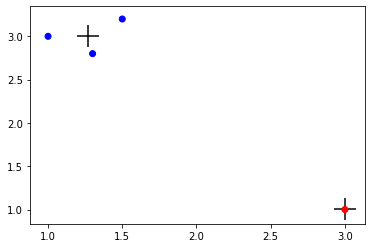

In [34]:
plt.scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='black')
plt.scatter(X[:,0], X[:,1], c=lista_cores)